In [1]:
import cv2
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
X = [] # feature vectors
Y = [] # labels

sample_faces_dir = "Sample_faces"
for filename in os.listdir(sample_faces_dir):
    image_path = os.path.join(sample_faces_dir, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (64, 64))
    image = image.flatten()
    X.append(image)
    if (filename.startswith('a')):
        Y.append(1)
    else:
        Y.append(0)

x = np.array(X)
y = np.array(Y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save scaler object
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Train SVM classifier
clf = SVC()
clf.fit(X_train, y_train)

# Save classifier object
with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9166666666666666


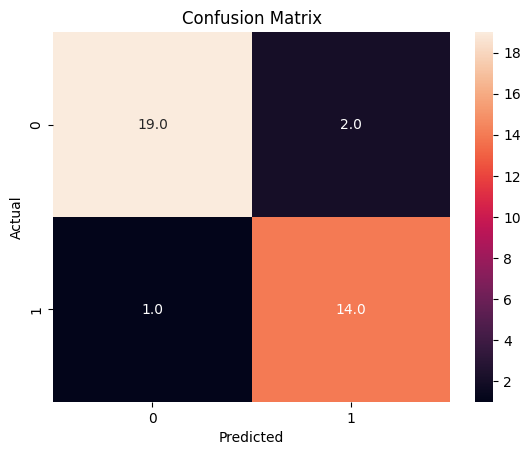

In [9]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()